# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 2. Поиск по образцу.**

Смена рабочей директории.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/2025-Kovalev-TimeSeriesCourse/practice/01 Basics')

Использование команд, которые автоматически перезагружают все импортированные модули при их изменении.

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Наивный алгоритм поиска по образцу.

Импорт библиотек и модулей.

In [2]:
import numpy as np
import pandas as pd
import time

from modules.utils import *
from modules.plots import *
from modules.bestmatch import *

### **Задача 1.**

В данной задаче вам предстоит самостоятельно реализовать наивный поиск top-$k$ похожих подпоcледовательностей временного ряда на заданный образец поиска.


Сначала выполните считывание временного ряда и образца поиска из файлов *ECG.csv* и *ECG_query.csv* соответственно, которые располагаются в директории *./datasets/part1*. Временной ряд представляет собой показания ЭКГ пациента, образец поиска – фрагмент ЭКГ, обозначающий кардиологическое заболевание. Необходимо по записи ЭКГ пациента определить, имеет ли он данное заболевание сердца.

In [3]:
def load_ts(file_name):

    ts = pd.read_csv(file_name, header=None, delim_whitespace=True)

    return ts

In [4]:
ts_url = './datasets/part1/ECG.csv'
query_url = './datasets/part1/ECG_query.csv'

ts = load_ts(ts_url).squeeze().to_numpy()
query = load_ts(query_url).squeeze().to_numpy()

C:\Users\Home\AppData\Local\Temp\ipykernel_28144\3852541726.py:3: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

C:\Users\Home\AppData\Local\Temp\ipykernel_28144\3852541726.py:3: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



Выполните визулизацию временного ряда и образца поиска с помощью функции `plot_bestmatch_data()` из модуля plots.py.

In [5]:
plot_bestmatch_data(ts, query)

Реализуйте самостоятельно наивный поиск top-$k$ подпоследовательностей временного ряда, похожих на образец поиска в смысле DTW меры. Для этого уже подготовлен шаблон класса `NaiveBestMatchFinder` в модуле *bestmatch.py*. Напишите метод `perform()`, выполняющий обнаружение подпоследовательностей ряда, похожих на образец поиска. При этом метод должен избегать попадания в результирующее множество пересекающихся подпоследовательностей. Воспользуйтесь функцией `_top_k_match()` из базового класса `BestMatchFinder`, которая возвращает top-$k$ похожих на образец поиска непересекающихся подпоследовательностей.

При реализации опирайтесь на псевдокод наивного алгоритма поиска, который представлен ниже.

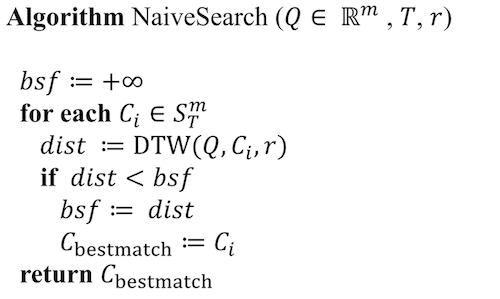

In [6]:
top_k = 2
r = 0.01
exclusion_zone = 1
normalize = True

naive_bestmatch_results = {}
a = NaiveBestMatchFinder(ts[1000:2000], query, exclusion_zone, 3, True, r)
naive_bestmatch_results= a.perform()


In [7]:
naive_bestmatch_results

{'index': [np.int64(146), np.int64(570)],
 'distance': [np.float64(1150795.6958841812), np.float64(1168310.553217273)]}

In [8]:
naive_bestmatch_results.values()

dict_values([[np.int64(146), np.int64(570)], [np.float64(1150795.6958841812), np.float64(1168310.553217273)]])

Напишите функцию `plot_bestmatch_results()` в модуле *plots.py* для визуализации найденных top-$k$ похожих подпоследовательностей временного ряда на образец поиска. За основу возьмите функцию `plot_bestmatch_data()` и добавьте отображение найденных подпоследовательностей, показанных тем же цветом, что и образец поиска.

In [9]:
plot_bestmatch_results(ts[1000:], query, naive_bestmatch_results)

### **Задача 2**.
Проведите эксперименты по исследованию длины образца поиска и ширины полосы Сако—Чиба на время выполнения наивного алгоритма. Длина временного ряда должна быть зафиксирована.

Для проведения экспериментов сгенерируйте временной ряд заданной длины и множество образцов поиска различных длин на основе модели случайных блужданий (функция `random_walk()` в *utils.py*).

In [10]:
n = 2000 # length of time series
m_list = [16, 32, 64, 128] # lengths of query

time_series = np.random.randn(n)


In [11]:
q_list = []

In [12]:
for i in m_list:
  q_list.append(random_walk(i))

In [13]:
import time


top_k = 3
r_list = np.round(np.arange(0, 0.6, 0.1), 2)
exclusion_zone = 1
normalize = True

naive_times = np.zeros((len(r_list), len(m_list)))
timeit = []
naive_bestmatch_results = {}

for i in q_list:
    timeit_row = []
    for j in r_list:
        start_time = time.time()
        a = NaiveBestMatchFinder(time_series, i, exclusion_zone, 3, True, j)
        naive_bestmatch_results = a.perform()
        end_time = time.time()
        elapsed_time = end_time - start_time
        timeit_row.append(elapsed_time)
    timeit.append(timeit_row)

timeit = np.array(timeit)
print(timeit)

[[ 0.27800035  0.27029061  0.27754903  0.30757928  0.26900029  0.26943064]
 [ 1.11984897  1.09509087  1.09622598  1.0996542   1.11010122  1.11468387]
 [ 4.50650716  4.35158587  4.40160203  4.46596122  4.40389371  4.45323896]
 [17.25253773 18.69470763 17.2577312  17.35286832 17.47195888 18.09916234]]


Постройте график зависимости времени выполнения наивного алгоритма от длины образца поиска временного ряда и ширины полосы Сако–Чиба.

In [14]:
x_title = 'Subsequence length, m'
y_title = 'Runtime, s'
plot_title = 'Runtime depending on subsequence length and warping window size'
trace_titles = np.array([f'r = {r}' for r in r_list])



mplot2d(m_list, timeit, plot_title, x_title, y_title, trace_titles)